In [64]:
#we can create a new feature combining X3 distance to the nearest MRT station and X4 number of convenience stores
#the interaction term will capture the combined influence of distance to the MRT and convenience stores

# Create proximity-convenience score
clean_data = clean_data.copy()
clean_data.loc[:, 'Proximity_Convenience_Score'] = clean_data['X3 distance to the nearest MRT station'] * (clean_data['X4 number of convenience stores'] + 1)

In [66]:
clean_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Proximity_Convenience_Score
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,37.9,933.66702
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,42.2,3065.94700
2,3,2013-08-02,13.3,561.98450,5,24.98746,121.54391,47.3,3371.90700
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8,3371.90700
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1,2343.41040


In [68]:
#to group similar locations based on latitude and longitude, we can apply KMeans clustering
#the cluster ID can be added as a new feature

from sklearn.cluster import KMeans

# Define number of clusters (e.g., 5 clusters)
clean_data = clean_data.copy()
kmeans = KMeans(n_clusters=5, random_state=42)
clean_data.loc[:, 'Neighborhood_Cluster'] = kmeans.fit_predict(clean_data[['X5 latitude', 'X6 longitude']])
clean_data.head()

C:\Users\USER\OneDrive\Dokumenter\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Proximity_Convenience_Score,Neighborhood_Cluster
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,37.9,933.66702,4
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,42.2,3065.94700,4
2,3,2013-08-02,13.3,561.98450,5,24.98746,121.54391,47.3,3371.90700,4
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8,3371.90700,4
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1,2343.41040,4


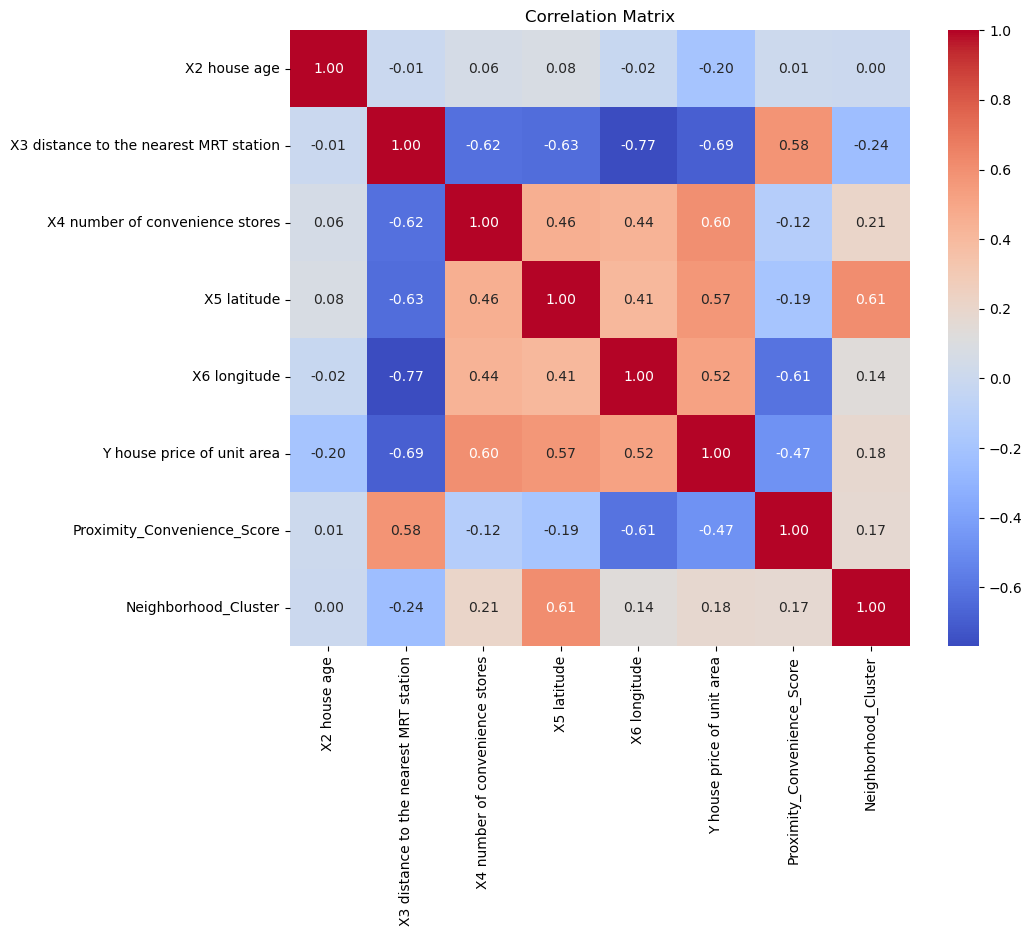

In [70]:
#let's now check the correlation
import matplotlib.pyplot as plt
import seaborn as sns

new_features = clean_data.drop(columns=['X1 transaction date', 'No'])

# Compute correlation matrix
corr_matrix = new_features.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#no high positive correlations

In [72]:
#for X1 transaction date, let's extract features like the year, month, and quarter from this column
#this could be important for predicting housing prices based on seasonality or trends

# Extract year, month, and quarter from the transaction date
# Extract year, month, and quarter from the transaction date
clean_data.loc[:, 'Year'] = clean_data['X1 transaction date'].dt.year
clean_data.loc[:, 'Month'] = clean_data['X1 transaction date'].dt.month
clean_data.loc[:, 'Quarter'] = clean_data['X1 transaction date'].dt.quarter
clean_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Proximity_Convenience_Score,Neighborhood_Cluster,Year,Month,Quarter
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,37.9,933.66702,4,2012,12,4
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,42.2,3065.94700,4,2012,12,4
2,3,2013-08-02,13.3,561.98450,5,24.98746,121.54391,47.3,3371.90700,4,2013,8,3
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8,3371.90700,4,2013,7,3
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1,2343.41040,4,2012,10,4
